In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [83]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
from matplotlib import pyplot as plt

# DEFINITIONS

In [5]:
enchanting = pd.read_csv('enchanting.csv')

In [6]:
enchanting.head()

,luck,item,item_level,enchanting_level,result
0,NAN,accessory,0,0,fail
1,NAN,accessory,0,1,fail
2,NAN,accessory,0,2,fail
3,NAN,accessory,0,3,fail
4,NAN,accessory,0,4,fail


In [7]:
levels = range(0,4)
item_levels = range(0,2)

fails = enchanting.result == 'fail'
wins = enchanting.result == 'win'

luck_2 = enchanting.luck == '2'
luck_4 = enchanting.luck == '4'

il = lambda x: enchanting.item_level == x
el = lambda x: enchanting.enchanting_level == x
i = lambda x: enchanting.item == x
l = lambda x: enchanting.luck == x

In [8]:
def ratios(item, item_level, enchanting_level, luck):
    fail = enchanting[i(item)][l(luck)][il(item_level)][el(enchanting_level)]['result'].count()
    win = enchanting[i(item)][l(luck)][il(item_level)][el(enchanting_level)]['result'].count()
    return (win+fail), win*1.0/(win+fail)

In [312]:
def ratios_ignore_luck(item, item_level, enchanting_level):
    fail = enchanting[fails][i(item)][il(item_level)][el(enchanting_level)]['result'].count()
    win = enchanting[wins][i(item)][il(item_level)][el(enchanting_level)]['result'].count()
    if win+fail > 5:
        return item_level, (win+fail), win*1.0/(win+fail)
    elif enchanting_level > 1:
        return ratios_ignore_luck(item, item_level,enchanting_level-1)
    else:
        return ratios_ignore_luck(item, item_level-1,enchanting_level)

In [273]:
def ratios_ignore_luck_enchanting_level(item, item_level):
    fail = enchanting[fails][i(item)][il(item_level)]['result'].count()
    win = enchanting[wins][i(item)][il(item_level)]['result'].count()
    if (win+fail) >5:
        return item_level, (win+fail), win*1.0/(win+fail)
    else:
        return ratios_ignore_luck_enchanting_level(item, item_level-1)

# KNOWN FACTS

LinregressResult(slope=-0.025000000000000001, intercept=0.40000000000000002, rvalue=-1.0, pvalue=2.5000000000000343e-60, stderr=0.0)


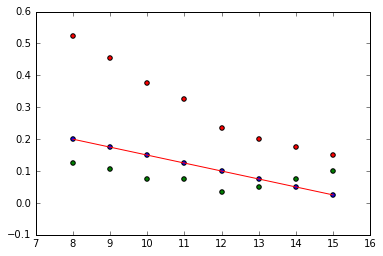

In [73]:
weapon_level = np.arange(8,16)
probabilities =  [.2, .175, .15, .125, .1, .075, .05, .025]
highest_failstacks = [13, 14, 15, 16, 18, 20, 25, 25]
increase = [.025, .02, .015, .0125, .0075,.0063, .005, .005]
result = stats.linregress(weapon_level, probabilities)
print result
scatter(weapon_level, probabilities)
plot(weapon_level, [x*result.slope+result.intercept for x in weapon_level], 'r')
scatter(weapon_level, probabilities + np.multiply(highest_failstacks, increase), c='r')
scatter(weapon_level, np.multiply(highest_failstacks, increase) - probabilities, c='g')

# CALCULATING EXPECTED VALUES

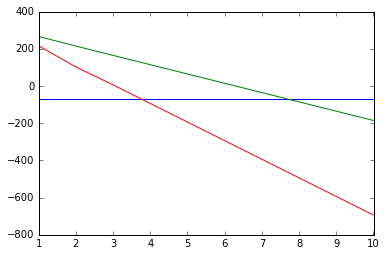

In [299]:
preco_blackstone = 350
preco_acessorio = 50
preco_acessorio_r1 = 100
p_blackstone = lambda x: -.025*x + .4
rank = 9
tries = 10

expected_value_blackstone = lambda tries, rank: -p_blackstone(rank)*preco_blackstone
expected_value_acessorio = lambda tries, rank: (preco_blackstone-(preco_acessorio*(1-ratios_ignore_luck('accessory', 0, tries)[2]))) - preco_acessorio*tries
expected_value_acessorio_r1 = lambda tries, rank: (preco_blackstone-(preco_acessorio*(1-ratios_ignore_luck('accessory', 1, tries)[2]))) - preco_acessorio_r1*tries

plot(range(1,tries+1),[ expected_value_blackstone(x,8) for x in range(1,tries+1)],c='b')
plot(range(1,tries+1),[ expected_value_acessorio(x,8) for x in range(1,tries+1)],c='g')
plot(range(1,tries+1),[ expected_value_acessorio_r1(x,8) for x in range(1,tries+1)],c='r')

<Container object of 25 artists>

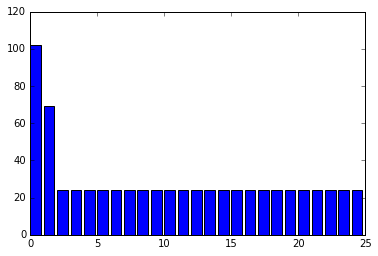

In [315]:
bar(range(0,25),[ratios_ignore_luck('accessory',0,x)[1] for x in range(0,25)])

In [311]:
ratios_ignore_luck('accessory',0,5)

(0, 4, 0.25)

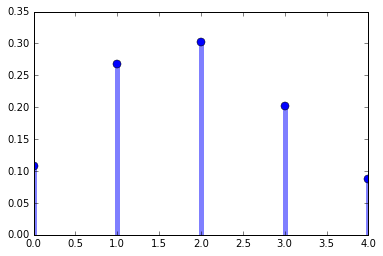

In [226]:
rv = binom(10, .2)

x = np.arange(rv.ppf(0.01), rv.ppf(0.99))
plot(x, rv.pmf(x), 'bo', ms=8, label='binom pmf')
vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)